<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/05_Modelo_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AgeMonths              2007 non-null   float64
 1   WeightKg               2007 non-null   float64
 2   Vaccinated             2007 non-null   int64  
 3   HealthCondition        2007 non-null   int64  
 4   TimeInShelterDays      2007 non-null   int64  
 5   AdoptionFee            2007 non-null   float64
 6   PreviousOwner          2007 non-null   int64  
 7   AdoptionLikelihood     2007 non-null   int64  
 8   ('Bird',)              2007 non-null   float64
 9   ('Cat',)               2007 non-null   float64
 10  ('Dog',)               2007 non-null   float64
 11  ('Rabbit',)            2007 non-null   float64
 12  ('Golden Retriever',)  2007 non-null   float64
 13  ('Labrador',)          2007 non-null   float64
 14  ('Parakeet',)          2007 non-null   float64
 15  ('Pe

(None,
    AgeMonths  WeightKg  Vaccinated  HealthCondition  TimeInShelterDays  \
 0   0.730337  0.138783           1                0                 27   
 1   0.404494  0.520009           0                0                  8   
 2   0.758427  0.036514           0                0                 85   
 3   0.539326  0.080105           0                0                 61   
 4   0.685393  0.672244           0                0                 28   
 
    AdoptionFee  PreviousOwner  AdoptionLikelihood  ('Bird',)  ('Cat',)  ...  \
 0     0.280561              0                   0        1.0       0.0  ...   
 1     0.470942              0                   0        0.0       0.0  ...   
 2     0.771543              0                   0        0.0       0.0  ...   
 3     0.434870              1                   0        1.0       0.0  ...   
 4     0.028056              1                   0        0.0       0.0  ...   
 
    ('Parakeet',)  ('Persian',)  ('Poodle',)  ('Rabbit',).1

In [ ]:
X = df.drop(columns=["TimeInShelterDays"])
y = df["TimeInShelterDays"]
X = np.array(X)
y = np.array(y)

In [ ]:
def output_activation():
    """funcion que entrena un modelo
    con datos aleatorios para confirmar la función
    de activación de la ultima capa
    """
    mlp = MLPRegressor()
    # fit with some random data
    xrandom = np.random.rand(10,2)
    yrandom = np.zeros(10)
    # llamar el metodo adecuado para entrenar
    # el mlp con los x y 'y' random
    mlp.fit(xrandom, yrandom)
    # retornar el atributo de mlp adecuado
    return (mlp.out_activation_)

In [ ]:
def experimetar_mlpr(num_hidden_layers, num_neurons, X,Y):
    """ función para realizar experimentos con el MLP
    num_hidden_layers: list de enteros con el número de capdas
        ocultas a usar
    num_neurons: list de enteros con el número de neuronas a usar
    X: matriz de numpy con los datos de entrada [muestras,variables]
    Y: matriz numpy con las variables a predecir

    Retorna: dataframe con 6 columnas:
        - número de capas, número de neuronas
        - promedio de error prueba variable 1 y desviación estandar
        - promedio de error prueba variable 2 y desviación estandar

    """
    #Validamos el modelo
    Folds = 6
    kf = KFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
      for neurons in num_neurons:
        j = 0
        for train_index, test_index in kf.split(X):
          mape_train = np.zeros(Folds)
          mape_test = np.zeros(Folds)
          X_train, X_test = X[train_index], X[test_index]
          y_train, y_test = y[train_index], y[test_index]
          #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
          #Ajuste la semilla del modelo a 1 para garantizar la reproducibilidad de los resultados.
          hidden_layer_sizes = tuple([neurons]*hidden_layers)
          mlp = MLPRegressor(random_state=1, hidden_layer_sizes=hidden_layer_sizes, activation='tanh', max_iter=500)
          # entrena el MLP
          mlp.fit(X_train, y_train)
          y_est_train = mlp.predict(X_train)
          # Use para el modelo para hacer predicciones sobre el conjunto Xtest
          Yest = mlp.predict(X_test)
          mape_test[j] = mean_absolute_percentage_error(y_test, Yest)
          mape_train[j] = mean_absolute_percentage_error(y_train, y_est_train)
          j+=1
        print('error para salida 1 = ' + str(np.mean(mape_test)) + '+-' + str(np.std(mape_test)))

        resultados.loc[idx,'capas ocultas'] = hidden_layers
        resultados.loc[idx,'neuronas en capas ocultas'] = neurons
        resultados.loc[idx,'error de prueba(media)'] = np.mean(mape_test)
        resultados.loc[idx,'intervalo de confianza'] = np.std(mape_test)
        resultados.loc[idx,'error de prueba train(media)'] = np.mean(mape_train)
        resultados.loc[idx,'intervalo de confianza train'] = np.std(mape_train)
        idx+=1
      mlpr = mlp
    return mlpr, Yest, y_test, resultados

In [ ]:
mlpr, mYest, y_test, resultados_mlpr = experimetar_mlpr(num_hidden_layers = [1,2,3], num_neurons  = [8,12,16], X=X, Y=y)
resultados_mlpr

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

error para salida 1 = 0.2541837822031821+-0.5683722157843164


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

error para salida 1 = 0.28512906421052325+-0.6375679699356324


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

error para salida 1 = 0.29435381955107487+-0.6581951499529101


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

error para salida 1 = 0.24155401687282485+-0.5401312019657675


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

error para salida 1 = 0.2872010812509092+-0.6422011408884734


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

error para salida 1 = 0.2940814238876906+-0.6575860547328067


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

error para salida 1 = 0.24592908226074472+-0.5499141455791628


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

error para salida 1 = 0.2837645775709397+-0.6345168850551333


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

error para salida 1 = 0.2938091825534936+-0.6569773046032568


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,capas ocultas,neuronas en capas ocultas,error de prueba(media),intervalo de confianza,error de prueba train(media),intervalo de confianza train
0,1.0,8.0,0.254184,0.568372,0.298357,0.667147
1,1.0,12.0,0.285129,0.637568,0.336453,0.752331
2,1.0,16.0,0.294354,0.658195,0.347445,0.776910
3,2.0,8.0,0.241554,0.540131,0.282360,0.631377
4,2.0,12.0,0.287201,0.642201,0.338932,0.757874
5,2.0,16.0,0.294081,0.657586,0.347116,0.776174
6,3.0,8.0,0.245929,0.549914,0.287925,0.643820
7,3.0,12.0,0.283765,0.634517,0.334857,0.748763
8,3.0,16.0,0.293809,0.656977,0.346791,0.775449


In [ ]:
mlp = MLPRegressor(random_state=1, hidden_layer_sizes=16, activation='tanh', max_iter=1000)
Xtrain = X[:1404, :]
Ytrain = y[:1404]
Xtest = X[1404:, :]
Ytest = y[1404:]

In [ ]:
mlp.fit(Xtrain, Ytrain)
yest = mlp.predict(Xtest)


In [ ]:
def graficar_predicciones(y_real, y_predicho, cantidad_muestras):
    """
    Muestra una gráfica comparando los valores reales y predichos.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_real[:cantidad_muestras], label='Valor real', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_predicho[:cantidad_muestras], label='Valor predicho', marker='x', linestyle='--', alpha=0.7)
    plt.title('Comparación entre valores reales y predichos')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

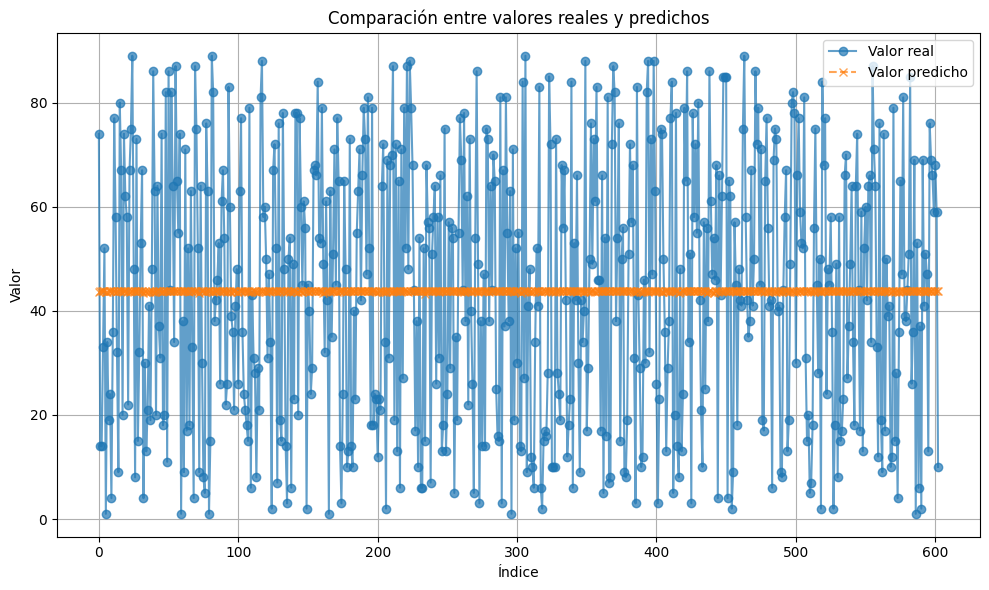

In [ ]:
graficar_predicciones(Ytest, yest, 1400)

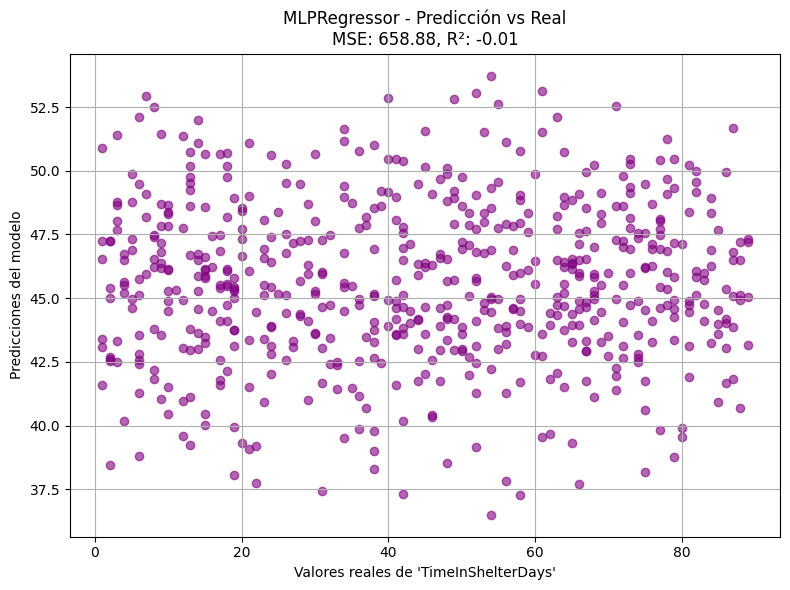

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
mlp.fit(Xtrain, Ytrain)

y_pred = mlp.predict(Xtest)

mse = mean_squared_error(Ytest, y_pred)
r2 = r2_score(Ytest, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(Ytest, y_pred, alpha=0.6, color='purple')
plt.xlabel("Valores reales de 'TimeInShelterDays'")
plt.ylabel("Predicciones del modelo")
plt.title(f"MLPRegressor - Predicción vs Real\nMSE: {mse:.2f}, R²: {r2:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2522.6494 - mae: 43.1705 - val_loss: 2255.3997 - val_mae: 39.9075
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2228.6826 - mae: 39.9403 - val_loss: 1699.3479 - val_mae: 33.5673
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1548.2054 - mae: 32.1189 - val_loss: 991.5016 - val_mae: 25.8143
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 886.4836 - mae: 25.1430 - val_loss: 720.7398 - val_mae: 23.1785
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 693.7753 - mae: 22.7267 - val_loss: 709.1754 - val_mae: 23.1475
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 641.2389 - mae: 21.8448 - val_loss: 705.1958 - val_mae: 23.1216
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 653.0644 - mae: 21.9893 - val_loss: 705.3458 - val_mae: 23.1528
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 662.8568 - mae: 22.0936 - val_loss: 706.2863 - val_mae: 23.1538
Epoch 9/100
41/41 ━━━━━

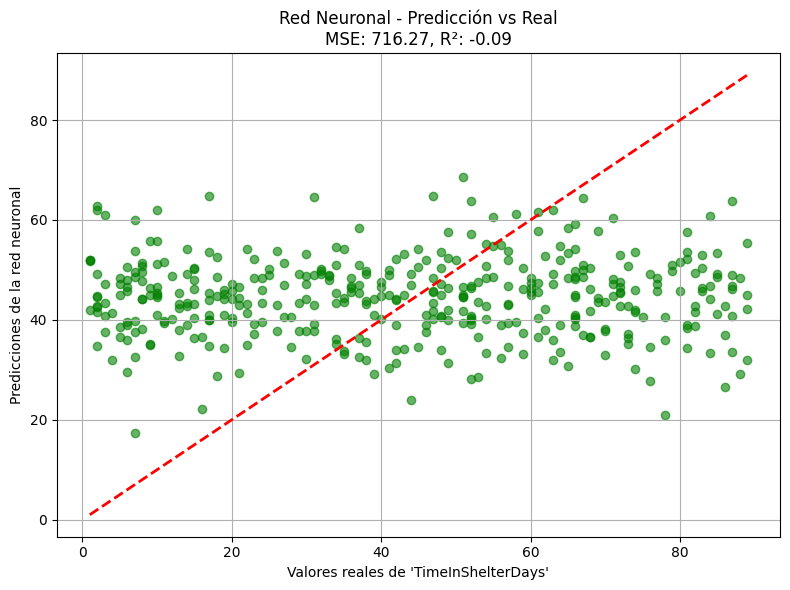

In [ ]:
X = df.drop(columns=['TimeInShelterDays'])
y = df['TimeInShelterDays']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Valores reales de 'TimeInShelterDays'")
plt.ylabel("Predicciones de la red neuronal")
plt.title(f"Red Neuronal - Predicción vs Real\nMSE: {mse:.2f}, R²: {r2:.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()